In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('D:dataset/loan_credibility_data.csv')


In [2]:
df.head()

,Unnamed: 0,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,145758,145759,9961107,33,15,single,rented,yes,Surveyor,Karimnagar,Telangana,11,14,0
1,133647,133648,4098399,79,15,single,rented,no,Computer_hardware_engineer,Aurangabad,Maharashtra,10,12,0
2,70149,70150,990478,26,15,single,norent_noown,no,Geologist,Ahmednagar,Maharashtra,5,13,0
3,193036,193037,9571049,43,8,single,rented,yes,Librarian,Bally,West_Bengal,8,11,0
4,45984,45985,7790773,40,10,married,rented,yes,Software_Developer,Bahraich,Uttar_Pradesh,9,12,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           20000 non-null  int64 
 1   Id                   20000 non-null  int64 
 2   income               20000 non-null  int64 
 3   age                  20000 non-null  int64 
 4   experience           20000 non-null  int64 
 5   married              20000 non-null  object
 6   house_ownership      20000 non-null  object
 7   car_ownership        20000 non-null  object
 8   profession           20000 non-null  object
 9   city                 20000 non-null  object
 10  state                20000 non-null  object
 11  current_job_years    20000 non-null  int64 
 12  current_house_years  20000 non-null  int64 
 13  risk_flag            20000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.1+ MB


In [4]:
df.isnull().sum()

Unnamed: 0             0
Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [5]:
(df.drop(columns="Id")).duplicated().sum()

0

In [6]:
df=df.drop(columns=["Unnamed: 0","Id","state","city"])
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag
0,9961107,33,15,single,rented,yes,Surveyor,11,14,0
1,4098399,79,15,single,rented,no,Computer_hardware_engineer,10,12,0
2,990478,26,15,single,norent_noown,no,Geologist,5,13,0
3,9571049,43,8,single,rented,yes,Librarian,8,11,0
4,7790773,40,10,married,rented,yes,Software_Developer,9,12,1


In [7]:
for i in df.columns:
    print(df[i].unique())

[9961107 4098399  990478 ... 9584983 9878857 4683990]
[33 79 26 43 40 45 25 32 29 38 75 72 71 58 63 54 28 47 73 66 62 76 46 64
 61 65 55 39 69 74 24 70 59 67 21 51 56 22 48 78 30 57 53 68 37 50 27 77
 36 23 34 44 52 49 60 35 41 31 42]
[15  8 10 18 11  9  4  5 14 13 17  7 12 19  3  0  6  1  2 16 20]
['single' 'married']
['rented' 'norent_noown' 'owned']
['yes' 'no']
['Surveyor' 'Computer_hardware_engineer' 'Geologist' 'Librarian'
 'Software_Developer' 'Statistician' 'Civil_servant' 'Politician'
 'Secretary' 'Aviator' 'Comedian' 'Artist' 'Web_designer'
 'Chartered_Accountant' 'Graphic_Designer' 'Petroleum_Engineer' 'Analyst'
 'Psychologist' 'Magistrate' 'Chemical_engineer' 'Civil_engineer'
 'Economist' 'Drafter' 'Engineer' 'Financial_Analyst' 'Flight_attendant'
 'Computer_operator' 'Architect' 'Technical_writer' 'Designer'
 'Industrial_Engineer' 'Dentist' 'Technician' 'Design_Engineer'
 'Physician' 'Official' 'Army_officer' 'Police_officer' 'Surgeon'
 'Air_traffic_controller' 'Mechanical

In [8]:
df["risk_flag"].value_counts()

0    17530
1     2470
Name: risk_flag, dtype: int64

In [9]:
df["married"].replace({'single':0,"married":1},inplace=True)
df["car_ownership"].replace({'no':0,"yes":1},inplace=True)
df["house_ownership"].replace({'norent_noown':0,"rented":1,"owned":2},inplace=True)

In [10]:
cs=["Computer_hardware_engineer","Software_Developer","Web_designer","Computer_operator"]
eng=["Petroleum_Engineer","Chemical_engineer","Civil_engineer","Engineer","Design_Engineer","Industrial_Engineer","Mechanical_engineer","Biomedical_Engineer"]
med=["Psychologist","Dentist","Surgeon","Physician","Microbiologist"]
sol=["Aviator","Police_officer","Firefighter","Air_traffic_controller","Army_officer"]
eco=["Chartered_Accountant","Analyst","Financial_Analyst","Consultant","Statistician","Economist"]
art=["Artist","Graphic_Designer","Drafter","Architect","Designer","Fashion_Designer"]
govt=["Secretary","Surveyor","Magistrate","Civil_servant","Lawyer","Official","Scientist"]
others=["Librarian","Politician","Geologist","Comedian","Flight_attendant","Technical_writer","Technician","Chef","Technology_specialist","Hotel_Manager"]


In [11]:
df["profession"].unique().shape

(51,)

In [12]:
len(cs)+len(eng)+len(med)+len(sol)+len(eco)+len(art)+len(govt)+len(others)

51

In [13]:
df["computer_science"]=np.where(df["profession"].isin(cs),1,0 )
df["Engineering"]=np.where(df["profession"].isin(eng),1,0 )
df["Medical"]=np.where(df["profession"].isin(med),1,0 )
df["Finance"]=np.where(df["profession"].isin(eco),1,0 )
df["Arts"]=np.where(df["profession"].isin(art),1,0 )
df["Government"]=np.where(df["profession"].isin(govt),1,0 )
df["Others"]=np.where(df["profession"].isin(others),1,0 )
df["Defence"]=np.where(df["profession"].isin(sol),1,0 )

In [14]:
df.head()

,income,age,experience,married,house_ownership,car_ownership,profession,current_job_years,current_house_years,risk_flag,computer_science,Engineering,Medical,Finance,Arts,Government,Others,Defence
0,9961107,33,15,0,1,1,Surveyor,11,14,0,0,0,0,0,0,1,0,0
1,4098399,79,15,0,1,0,Computer_hardware_engineer,10,12,0,1,0,0,0,0,0,0,0
2,990478,26,15,0,0,0,Geologist,5,13,0,0,0,0,0,0,0,1,0
3,9571049,43,8,0,1,1,Librarian,8,11,0,0,0,0,0,0,0,1,0
4,7790773,40,10,1,1,1,Software_Developer,9,12,1,1,0,0,0,0,0,0,0


In [15]:
(df["computer_science"]+df["Engineering"]+df["Medical"]+df["Arts"]+df["Government"]+df["Others"]+df["Finance"]+df["Defence"]).sum()

20000

In [16]:
len(df["profession"].value_counts())

51

<AxesSubplot:xlabel='income'>

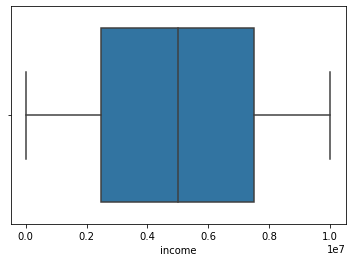

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='income',data=df)

<AxesSubplot:>

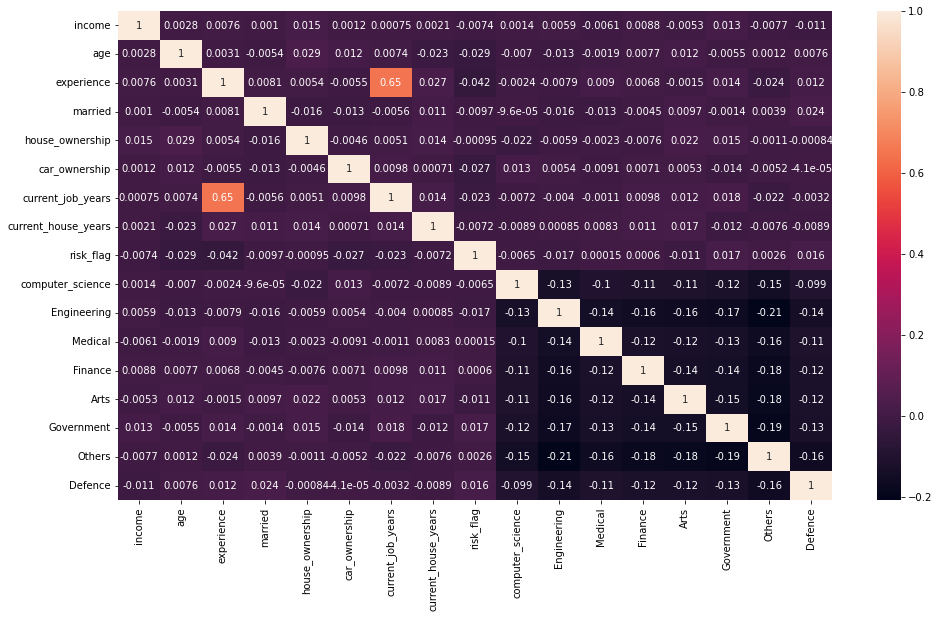

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

In [19]:
for i in df.columns:
    print(df[i].value_counts())

6963857    10
8724013    10
3915449    10
9013759     9
2860021     9
           ..
6133287     1
8565895     1
4103658     1
8955309     1
4683990     1
Name: income, Length: 8584, dtype: int64
27    430
41    413
33    399
66    397
48    394
50    386
25    385
45    381
68    381
78    379
24    377
54    377
47    374
23    373
69    372
56    367
55    367
35    366
72    365
79    365
76    361
53    351
49    351
26    349
43    348
60    345
64    343
31    341
37    339
58    337
30    333
71    332
22    331
61    330
59    329
28    328
62    328
57    323
32    322
38    320
67    318
39    318
77    313
74    313
70    310
40    310
42    309
65    305
34    305
29    304
21    302
63    298
75    296
44    293
73    283
46    277
51    263
52    257
36    237
Name: age, dtype: int64
12    1088
6     1074
5     1022
9     1008
17    1006
18     996
10     990
16     969
14     963
19     963
3      945
4      922
11     915
13     913
2      909
15     903
7      890
8   

In [20]:
df.describe()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag,computer_science,Engineering,Medical,Finance,Arts,Government,Others,Defence
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.998404e+06,49.880150,10.073850,0.101750,1.024600,0.302600,6.332550,11.999800,0.123500,0.084600,0.154350,0.101500,0.117300,0.120800,0.133100,0.192000,0.096350
std,2.888663e+06,17.106119,5.988054,0.302327,0.282133,0.459395,3.653536,1.406165,0.329018,0.278292,0.361293,0.301997,0.321785,0.325903,0.339691,0.393883,0.295078
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.487718e+06,35.000000,5.000000,0.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.995311e+06,50.000000,10.000000,0.000000,1.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.492021e+06,65.000000,15.000000,0.000000,1.000000,1.000000,9.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999400e+06,79.000000,20.000000,1.000000,2.000000,1.000000,14.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='age'>

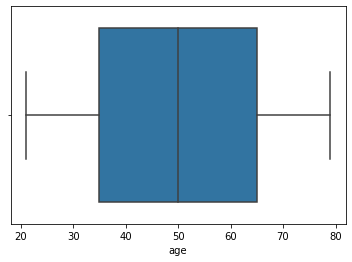

In [21]:
sns.boxplot(x='age',data=df)

<AxesSubplot:xlabel='experience'>

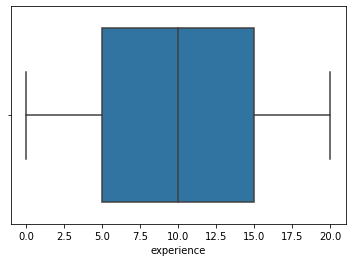

In [22]:
sns.boxplot(x='experience',data=df)

<AxesSubplot:xlabel='current_job_years'>

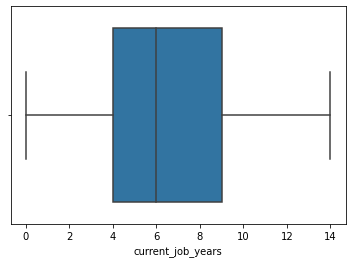

In [23]:
sns.boxplot(x='current_job_years',data=df)

<AxesSubplot:xlabel='current_house_years'>

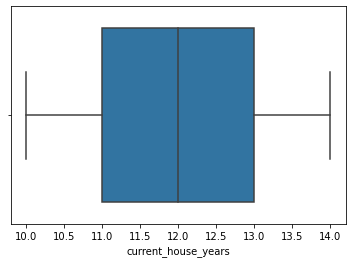

In [24]:
sns.boxplot(x='current_house_years',data=df)

<AxesSubplot:xlabel='age', ylabel='income'>

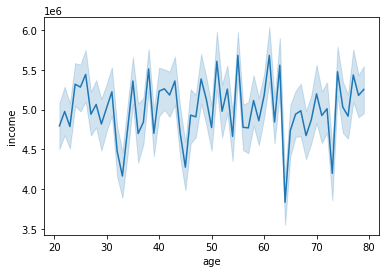

In [25]:
sns.lineplot(x='age',y='income',data=df)

In [26]:
df[df['Government']==1].describe()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag,computer_science,Engineering,Medical,Finance,Arts,Government,Others,Defence
count,2.662000e+03,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0,2662.0
mean,5.094681e+06,49.640120,10.291134,0.100676,1.035312,0.285875,6.504508,11.957551,0.137491,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,2.901531e+06,17.150189,5.886416,0.300956,0.278694,0.451915,3.612759,1.410516,0.344429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.111400e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,2.561042e+06,34.000000,5.000000,0.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,5.154501e+06,50.000000,11.000000,0.000000,1.000000,0.000000,6.000000,12.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,7.644982e+06,64.000000,15.000000,0.000000,1.000000,1.000000,9.000000,13.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,9.998070e+06,79.000000,20.000000,1.000000,2.000000,1.000000,14.000000,14.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
x=df.drop(columns=['profession','risk_flag'])
y=df['risk_flag']

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote=SMOTE(sampling_strategy={1:6000},random_state=42)

In [30]:
x1,y1=smote.fit_sample(x,y)

In [31]:
y1.value_counts()

0    17530
1     6000
Name: risk_flag, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.22,random_state=42)
x_test.shape

(5177, 16)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7541046938381302

In [35]:
pred=lr.predict(x_test)
pd.DataFrame(pred).value_counts()

0    5177
dtype: int64

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=30,random_state=42)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8898976241066254

In [37]:
pred=dt.predict(x_test)
pd.DataFrame(pred).value_counts()

0    3878
1    1299
dtype: int64

In [38]:
y_test.value_counts()

0    3904
1    1273
Name: risk_flag, dtype: int64

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=30,n_estimators=150,random_state=56)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9105659648445046

In [40]:
pred=rf.predict(x_test)
pd.DataFrame(pred).value_counts()

0    4035
1    1142
dtype: int64

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8195866331852424

In [42]:
pred=knn.predict(x_test)
pd.DataFrame(pred).value_counts()

0    4098
1    1079
dtype: int64

In [43]:
from sklearn.svm import SVC
svm=SVC(kernel='poly')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.7541046938381302

In [44]:
pred=svm.predict(x_test)
pd.DataFrame(pred).value_counts()

0    5177
dtype: int64

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_test,y_test)

0.7541046938381302

In [46]:
import pickle
pickle.dump(rf,open('rfmodel.pkl','wb'))

In [ ]:
from